# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

### No blank cells.
### Removed date column since not needed.
### Column 2 is dependent variable.
### Remaining columns are independent variables.

In [2]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

## Check for missing values in dataset

In [3]:
missing = dataset.isnull().sum()
print('Below output shows the number of empty cells in each column')
print(missing)

Below output shows the number of empty cells in each column
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


## Check for data type of each column to identify and encode categorical data

In [4]:
dataset.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [5]:
print(X)

[[2.95 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [4.46 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.28 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 ...
 [3.17 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.06 0.11 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.02 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']]


In [6]:
print(y)

[3.17 4.   3.24 ... 3.78 3.78 3.67]


## Encoding categorical data

Convert week status column using label encoder since only 2 values weekday and weekend present.

In [7]:
print('before label encoding')
print(X[:, 6])

before label encoding
['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekday' 'Weekday']


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 6] = le.fit_transform(X[:, 6])

In [9]:
print('after label encoding')
print(X[:, 6])

after label encoding
[0 0 0 ... 0 0 0]


Convert both columns day of week and type of load using one hot encoding.

In [10]:
print('before one hot encoding')
print(X[:, 7:9])

before one hot encoding
[['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ...
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']]


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7, 8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print('after one hot encoding')
print(X[:, :10])

after one hot encoding
[[0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 ...
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]]


## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(X_train)

[[0.0 0.0 0.0 ... 100.0 84600 0]
 [0.0 0.0 0.0 ... 100.0 35100 0]
 [0.0 0.0 0.0 ... 100.0 2700 0]
 ...
 [0.0 0.0 0.0 ... 100.0 61200 0]
 [1.0 0.0 0.0 ... 100.0 25200 0]
 [0.0 1.0 0.0 ... 100.0 40500 0]]


In [15]:
print(y_train)

[  3.46  59.36  54.54 ... 114.91   2.66  90.97]


In [16]:
print(X_test)

[[0.0 0.0 0.0 ... 100.0 64800 0]
 [0.0 1.0 0.0 ... 99.98 0 0]
 [0.0 0.0 0.0 ... 37.57 44100 0]
 ...
 [0.0 0.0 0.0 ... 100.0 35100 0]
 [0.0 0.0 0.0 ... 18.19 38700 1]
 [0.0 0.0 1.0 ... 44.88 65700 1]]


In [17]:
print(X_test[0])

[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 4.5 0.32 0.02 99.66 100.0 64800 0]


In [18]:
print(y_test)

[54.22  3.67  4.03 ... 88.63  3.13  3.31]


## Training the Random Forest Regression model on the Training set

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

## Predicting the Test set results

In [20]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[47.79 54.22]
 [ 3.68  3.67]
 [ 4.17  4.03]
 ...
 [88.78 88.63]
 [ 3.13  3.13]
 [ 3.38  3.31]]


## Calculating Mean Square Error (MSE) in Random Forest Regression

In [21]:
error = y_pred - y_test
square_error = error ** 2
add_square_error = 0
for i in square_error:
    add_square_error += i
sum_square_error = add_square_error
mean_square_error = sum_square_error / len(y_pred)
print('Mean Square Error (MSE) is: ', mean_square_error)

Mean Square Error (MSE) is:  0.7579125655164075


## Calculating Root Mean Square Error (RMSE) in Random Forest Regression

In [22]:
from math import sqrt
root_mean_square_error = sqrt(mean_square_error)
print('Root Mean Square Error (RMSE) is: ', root_mean_square_error)

Root Mean Square Error (RMSE) is:  0.8705817397099526


## Calculating Mean Absolute Error (MAE) in Random Forest Regression

In [23]:
absolute_error = abs(error)
add_absolute_error = 0
for i in absolute_error:
    add_absolute_error += i
sum_absolute_error = add_absolute_error
mean_absolute_error = sum_absolute_error / len(y_pred)
print('Mean Absolute Error (MAE) is: ', mean_absolute_error)

Mean Absolute Error (MAE) is:  0.30502325199772623


## Plotting actual and predicted results in matplotlib for Random Forest Regression

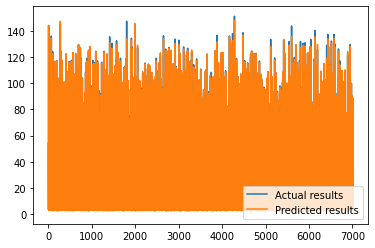

In [24]:
plt.plot(y_test, label='Actual results')
plt.plot(y_pred, label='Predicted results')
plt.legend(loc= 'lower right')
plt.show()

## Boxplot of results to show how similar they are in Random Forest Regression

([<matplotlib.axis.XTick at 0x1fc73611b10>,
 [Text(1, 0, 'Test results'), Text(2, 0, 'Predicted results')])

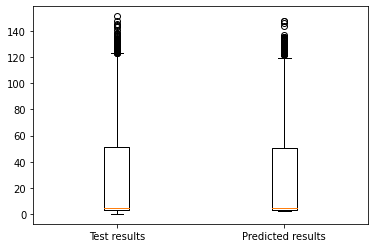

In [25]:
results = [y_test, y_pred]
plt.boxplot(results)
plt.xticks([1, 2], ['Test results', 'Predicted results'])